# Importing Libraries

In [111]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# EDA

In [112]:
data = pd.read_csv('marketing-segmentation.csv')

In [113]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [114]:
data.shape

(30, 2)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [116]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Satisfaction,30.0,6.400,2.620871,1.00,4.2500,7.00,8.7500,10.00
Loyalty,30.0,0.001,1.016476,-1.69,-0.9675,0.15,0.9475,1.38


# Extracting Features

In [117]:
X = data.copy().values
X

array([[ 4.  , -1.33],
       [ 6.  , -0.28],
       [ 5.  , -0.99],
       [ 7.  , -0.29],
       [ 4.  ,  1.06],
       [ 1.  , -1.66],
       [10.  , -0.97],
       [ 8.  , -0.32],
       [ 8.  ,  1.02],
       [ 8.  ,  0.68],
       [10.  , -0.34],
       [ 5.  ,  0.39],
       [ 5.  , -1.69],
       [ 2.  ,  0.67],
       [ 7.  ,  0.27],
       [ 9.  ,  1.36],
       [ 8.  ,  1.38],
       [ 7.  ,  1.36],
       [ 7.  , -0.34],
       [ 9.  ,  0.67],
       [10.  ,  1.18],
       [ 3.  , -1.69],
       [ 4.  ,  1.04],
       [ 3.  , -0.96],
       [ 6.  ,  1.03],
       [ 9.  , -0.99],
       [10.  ,  0.37],
       [ 9.  ,  0.03],
       [ 3.  , -1.36],
       [ 5.  ,  0.73]])

Text(0, 0.5, 'Loyalty')

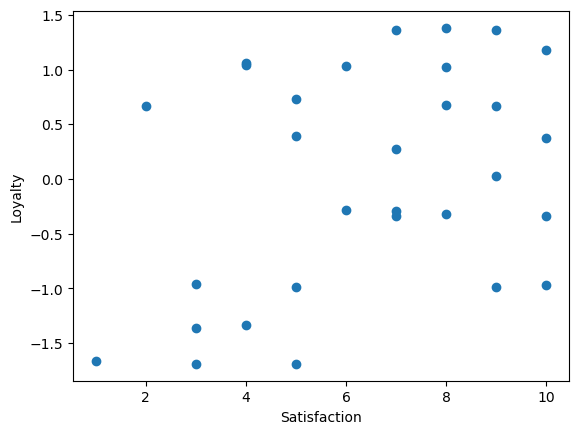

In [118]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

# Scaling Features

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
scaler = MinMaxScaler()

In [121]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.33333333, 0.11726384],
       [0.55555556, 0.45928339],
       [0.44444444, 0.22801303],
       [0.66666667, 0.45602606],
       [0.33333333, 0.89576547],
       [0.        , 0.00977199],
       [1.        , 0.23452769],
       [0.77777778, 0.44625407],
       [0.77777778, 0.88273616],
       [0.77777778, 0.77198697],
       [1.        , 0.43973941],
       [0.44444444, 0.67752443],
       [0.44444444, 0.        ],
       [0.11111111, 0.76872964],
       [0.66666667, 0.63843648],
       [0.88888889, 0.99348534],
       [0.77777778, 1.        ],
       [0.66666667, 0.99348534],
       [0.66666667, 0.43973941],
       [0.88888889, 0.76872964],
       [1.        , 0.93485342],
       [0.22222222, 0.        ],
       [0.33333333, 0.88925081],
       [0.22222222, 0.23778502],
       [0.55555556, 0.88599349],
       [0.88888889, 0.22801303],
       [1.        , 0.67100977],
       [0.88888889, 0.56026059],
       [0.22222222, 0.10749186],
       [0.44444444, 0.78827362]])

Text(0, 0.5, 'Loyalty')

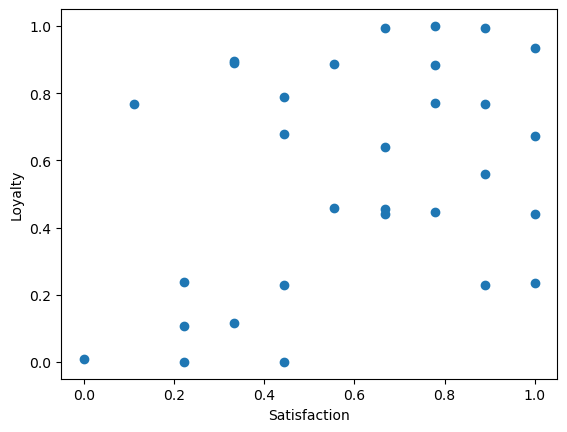

In [122]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

# Model TR

In [123]:
from sklearn.cluster import KMeans

In [124]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [125]:
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [126]:
kmeans.labels_

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0])

In [127]:
kmeans.cluster_centers_

array([[0.70048309, 0.68800453],
       [0.26984127, 0.10004653]])

Text(0, 0.5, 'Loyalty')

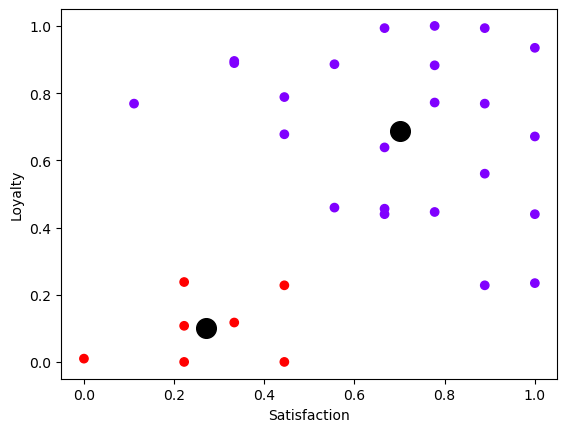

In [128]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, color='k')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [129]:
kmeans.cluster_centers_

array([[0.70048309, 0.68800453],
       [0.26984127, 0.10004653]])

In [130]:
wcss = []

for i in range(1, 11):
    tmp_Kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++')
    tmp_Kmeans.fit(X_scaled)
    wcss.append(tmp_Kmeans.inertia_)

wcss

[5.638441001240606,
 2.7879521709916397,
 1.6206629048867671,
 0.920355840405636,
 0.7065319927951245,
 0.6854300392279576,
 0.6350751376569511,
 0.4926790344705182,
 0.39213724506229825,
 0.31897016776373]

Text(0, 0.5, 'Inertia')

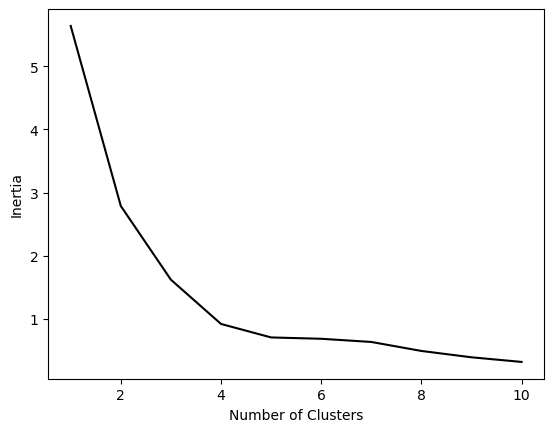

In [131]:
plt.plot(range(1, 11), wcss, c='k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [168]:
f_kmeans = KMeans(n_clusters=6, random_state=42, init='k-means++')
f_kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

Text(0, 0.5, 'Loyalty')

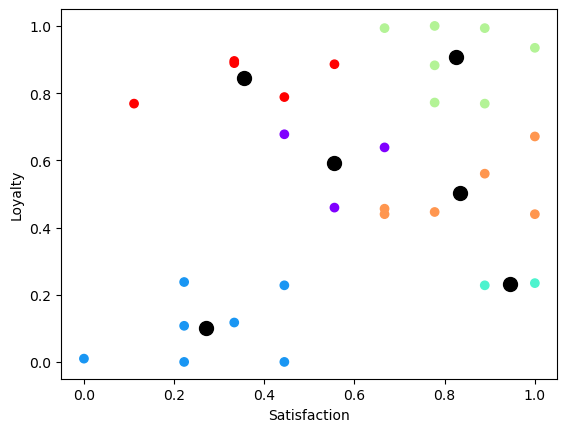

In [170]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=f_kmeans.labels_, cmap='rainbow')
plt.scatter(f_kmeans.cluster_centers_[:, 0], f_kmeans.cluster_centers_[:, 1], color = 'k', s = 100)
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [134]:
data['cluster'] = f_kmeans.labels_

In [135]:
data

,Satisfaction,Loyalty,cluster
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,4
4,4,1.06,5
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,4
8,8,1.02,3
9,8,0.68,3


In [172]:
f_kmeans.cluster_centers_

array([[0.55555556, 0.5917481 ],
       [0.26984127, 0.10004653],
       [0.94444444, 0.23127036],
       [0.82539683, 0.90646812],
       [0.83333333, 0.50217155],
       [0.35555556, 0.84560261]])

Text(0.5, 1.0, 'Data')

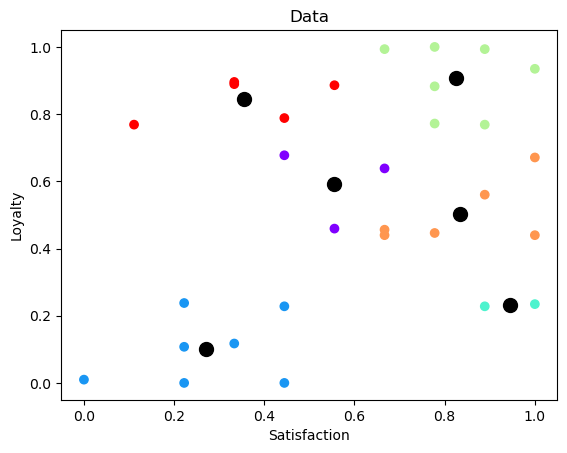

In [178]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=f_kmeans.labels_, cmap='rainbow')
plt.scatter(f_kmeans.cluster_centers_[:, 0], f_kmeans.cluster_centers_[:, 1], color = 'k', s = 100)
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.title('Data')